In [3]:
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas.balduino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
stops = stopwords.words('portuguese')
#stops = stopwords.words('english')
#stops.append('janeiro')
#stops.extend(['fevereiro','março','abril','maio'])
stops

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [10]:
import requests
link = "https://pt.wikipedia.org/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal"
corpus = requests.get(link)
corpus.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-not-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Wikipédia, a enciclopédia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-client

In [16]:
from bs4 import BeautifulSoup
corpus2 = BeautifulSoup(corpus.text, "html.parser").text

In [17]:
palavras = corpus2.split()
print(palavras)
len(palavras)

['Wikipédia,', 'a', 'enciclopédia', 'livre', 'Saltar', 'para', 'o', 'conteúdo', 'Menu', 'principal', 'Menu', 'principal', 'mover', 'para', 'a', 'barra', 'lateral', 'ocultar', 'Navegação', 'Página', 'principalConteúdo', 'destacadoEventos', 'atuaisEsplanadaPágina', 'aleatóriaPortaisInformar', 'um', 'erro', 'Colaboração', 'Boas-vindasAjudaPáginas', 'de', 'testes', 'públicasPortal', 'comunitárioMudanças', 'recentesManutençãoCriar', 'páginaPáginas', 'novasContato', 'Busca', 'Pesquisar', 'Aspeto', 'Donativos', 'Criar', 'uma', 'conta', 'Entrar', 'Ferramentas', 'pessoais', 'Donativos', 'Criar', 'uma', 'conta', 'Entrar', 'Páginas', 'para', 'editores', 'sem', 'sessão', 'iniciada', 'saber', 'mais', 'ContribuiçõesDiscussão', 'Wikipédia:Página', 'principal', 'Página', 'principalDiscussão', 'português', 'LerVer', 'fonteVer', 'histórico', 'Ferramentas', 'Ferramentas', 'mover', 'para', 'a', 'barra', 'lateral', 'ocultar', 'Operações', 'LerVer', 'fonteVer', 'histórico', 'Geral', 'Páginas', 'afluentesAlt

1168

In [18]:
palavras_semstop = [p for p in palavras if p not in stops]
len(palavras_semstop)

871

In [19]:
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]
len(palavras_sem_pontuacao)

857

In [20]:
frequencia = nltk.FreqDist(palavras_sem_pontuacao)
frequencia

FreqDist({'•': 24, 'livre': 10, 'Wikipédia': 8, 'conteúdo': 6, '…': 5, 'enciclopédia': 4, 'projetos': 4, '1': 4, 'Heterodontosaurus': 4, 'O': 4, ...})

In [21]:
mais_comuns = frequencia.most_common(50)
mais_comuns

[('•', 24),
 ('livre', 10),
 ('Wikipédia', 8),
 ('conteúdo', 6),
 ('…', 5),
 ('enciclopédia', 4),
 ('projetos', 4),
 ('1', 4),
 ('Heterodontosaurus', 4),
 ('O', 4),
 ('Guerra', 4),
 ('Wikipédia,', 3),
 ('principal', 3),
 ('mover', 3),
 ('barra', 3),
 ('lateral', 3),
 ('ocultar', 3),
 ('Donativos', 3),
 ('Criar', 3),
 ('conta', 3),
 ('Ferramentas', 3),
 ('Páginas', 3),
 ('editores', 3),
 ('português', 3),
 ('todos', 3),
 ('artigos', 3),
 ('Índice', 3),
 ('Artigos', 3),
 ('Carlos', 3),
 ('II', 3),
 ('Rússia', 3),
 ('Todos', 3),
 ('–', 3),
 ('cidade', 3),
 ('A', 3),
 ('Sobre', 3),
 ('sob', 3),
 ('sobre', 3),
 ('Estatísticas', 3),
 ('Menu', 2),
 ('Página', 2),
 ('erro', 2),
 ('Aspeto', 2),
 ('Entrar', 2),
 ('LerVer', 2),
 ('fonteVer', 2),
 ('histórico', 2),
 ('Wikimedia', 2),
 ('podem', 2),
 ('Ajuda', 2)]

In [24]:
import numpy as np
from PIL import Image
mask_cloud = np.array(Image.open("comment.png"))

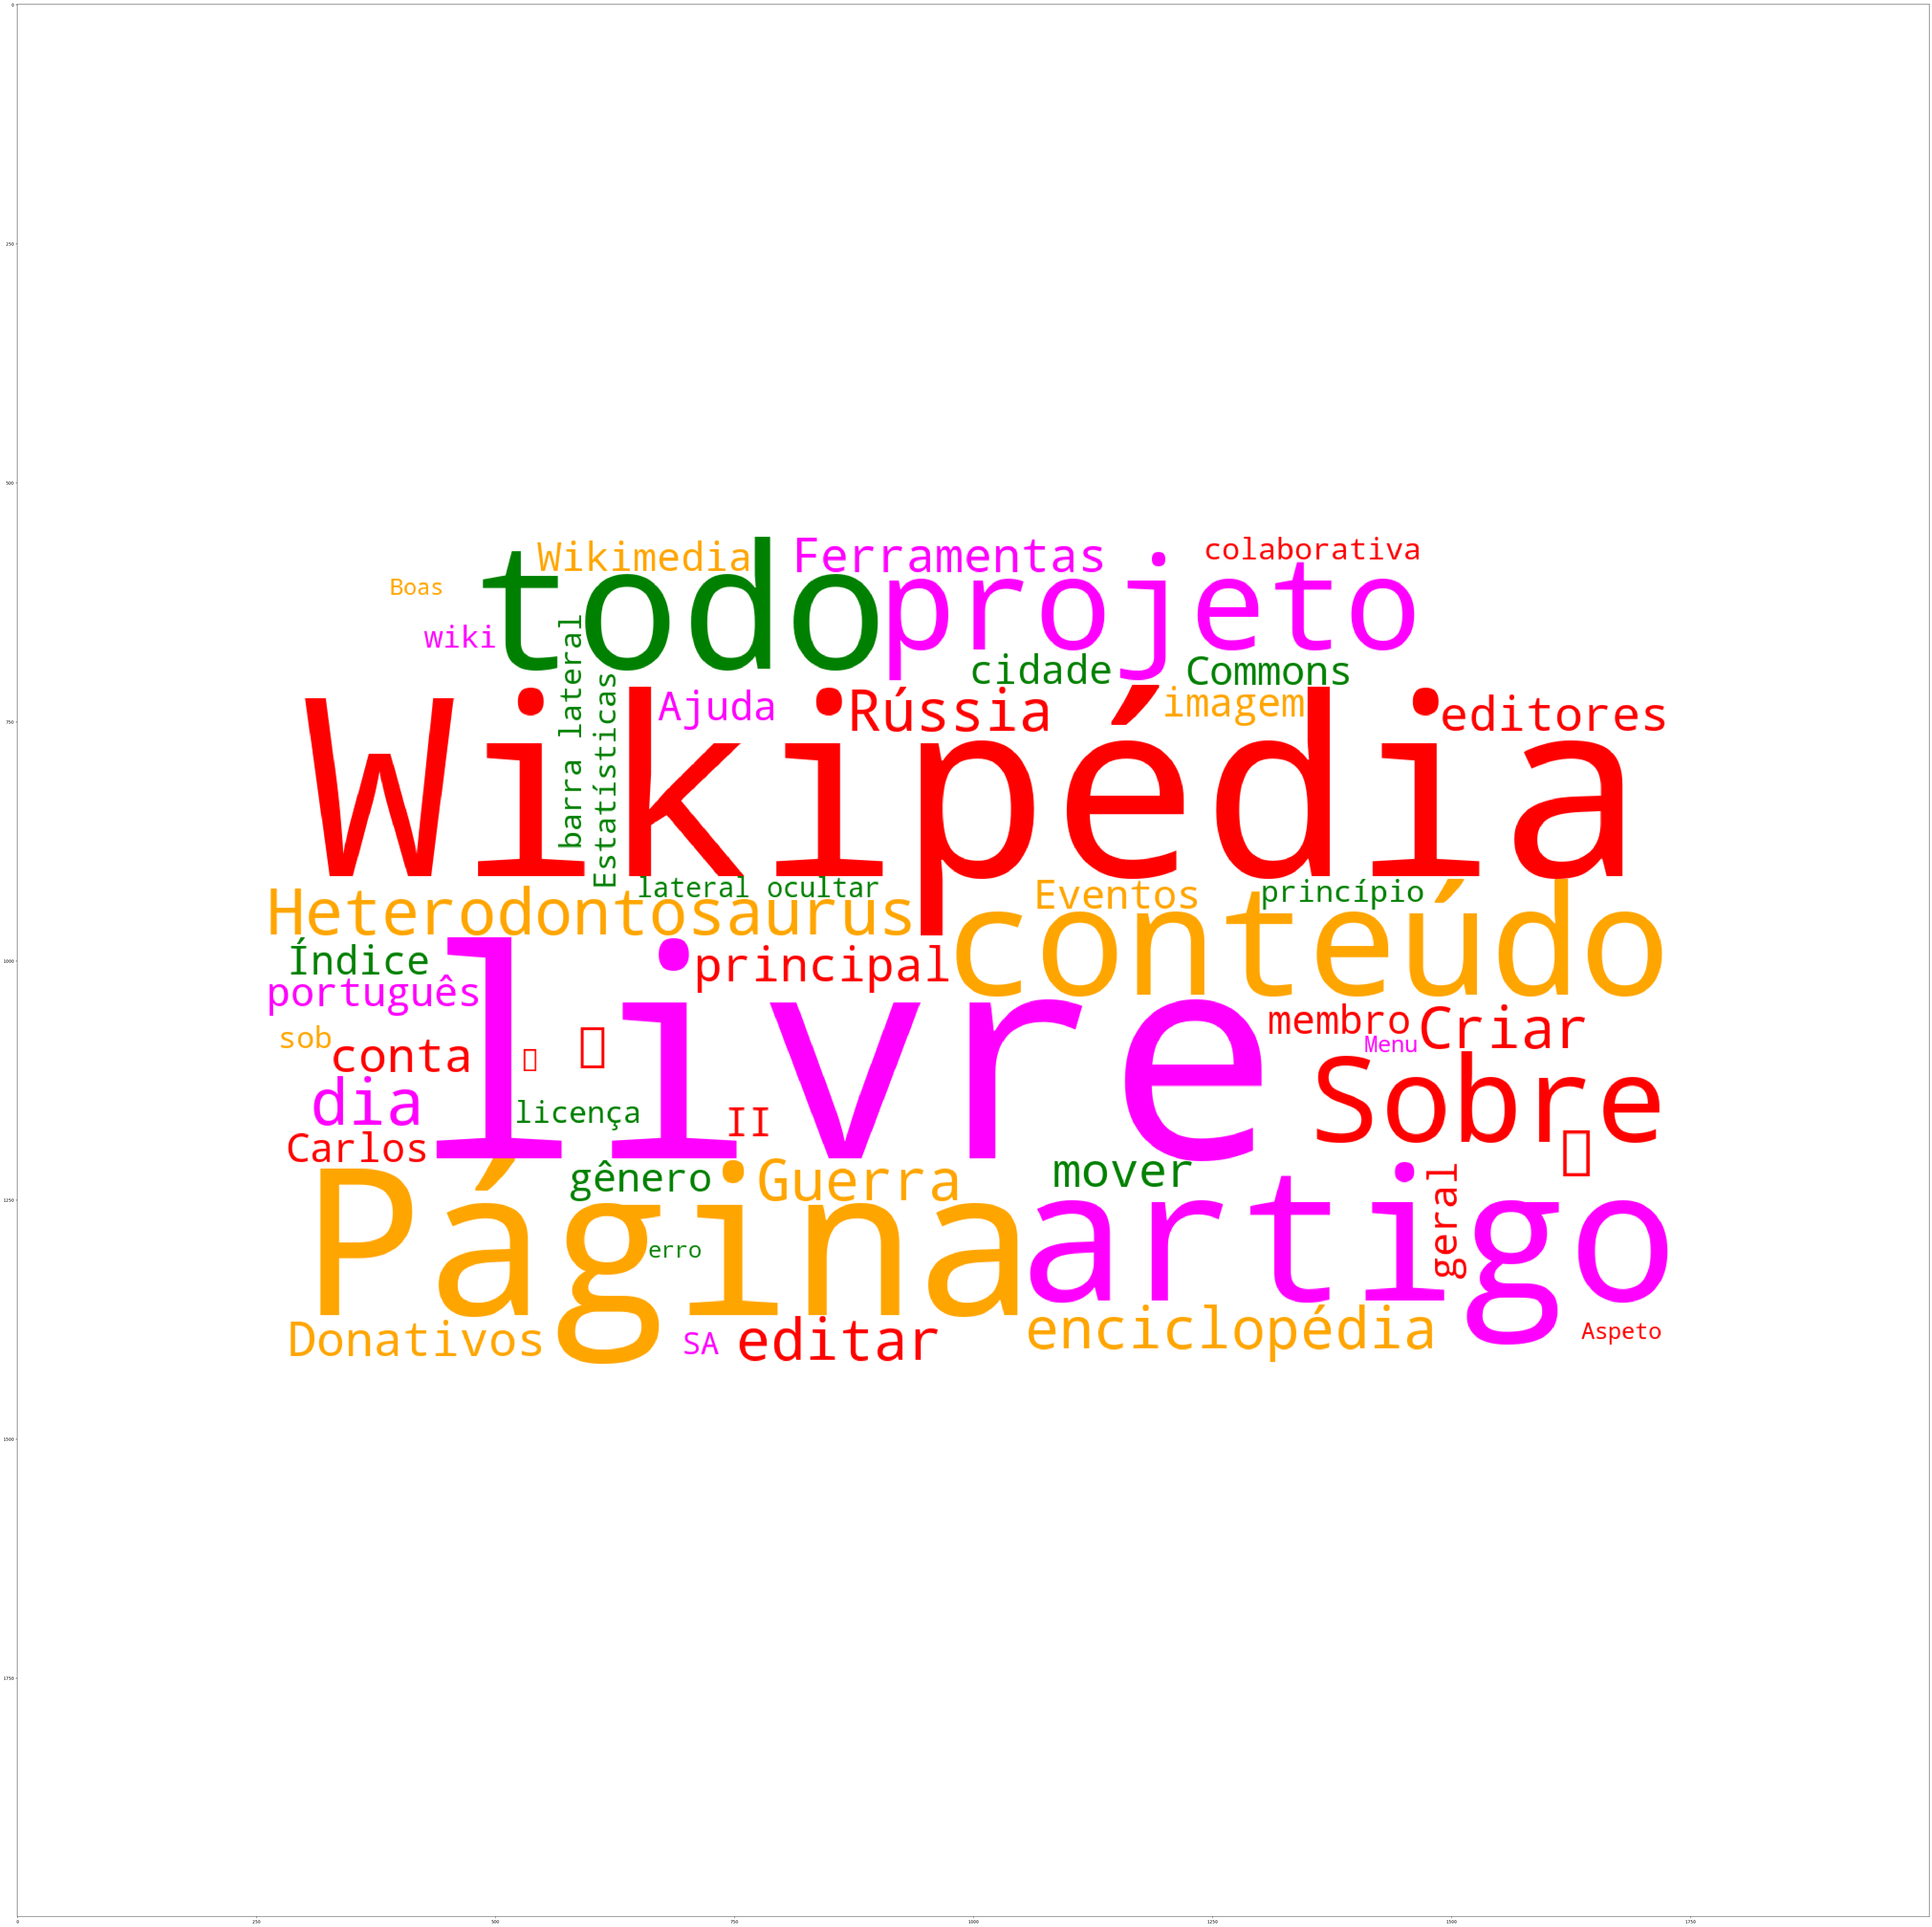

In [25]:
mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])

cloud = WordCloud(background_color= 'white',
                  colormap= mapa_cores,
                  stopwords = stops,
                  max_words = 50,
                  mask = mask_cloud,
                  width=1024,
                  height=1024,
                  random_state= 123)
cloud.generate(corpus2)
plt.figure( figsize=(80,80) )
plt.imshow(cloud)